In [220]:
import numpy as np
import pandas as pd
import numpy.random as npr

In [221]:
cd C:/Project CPC152

C:\Project CPC152


In [222]:
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Understanding the data

In [223]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [224]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [225]:
iris.shape

(150, 6)

In [226]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Cleaning Data

In [227]:
iris.apply(lambda x: sum(x.isnull()), axis = 0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Spliting the Dataset

In [228]:
x = iris.iloc[:, 1:6]
y = iris.iloc[:, 5]

In [229]:
print(x.shape)


(150, 5)


In [230]:
print(y.shape)


(150,)


In [231]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=4)

In [232]:
print(X_train.shape)
print(X_test.shape)

(105, 5)
(45, 5)


In [233]:
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


In [234]:
print(X_train1.shape)
print(X_test1.shape)

(120, 5)
(30, 5)


In [235]:
print(y_train1.shape)
print(y_test1.shape)

(120,)
(30,)


## Change the data type from string to numeric using Encoder

In [236]:
pd.options.mode.chained_assignment = None

In [237]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    X_train[i] = le.fit_transform(X_train[i])
X_train.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [238]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    X_test[i] = le.fit_transform(X_test[i])
X_test.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [239]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    X_train1[i] = le.fit_transform(X_train1[i])
X_train1.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [240]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Species']
le = LabelEncoder()
for i in var_mod:
    X_test1[i] = le.fit_transform(X_test1[i])
X_test1.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

## Feature Scaling

In [241]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_test = sc_X.fit_transform(X_test)
#X_train = sc_X.fit_transform(X_train)
#X_test1 = sc_X.fit_transform(X_test1)
#X_train1 = sc_X.fit_transform(X_train1)

In [242]:
data = pd.read_csv('train_set.csv')

In [243]:
x = data.iloc[:, 2:6]
y = data.iloc[:, -1]

In [244]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.08697949 0.05885755 0.41803257 0.43613039]


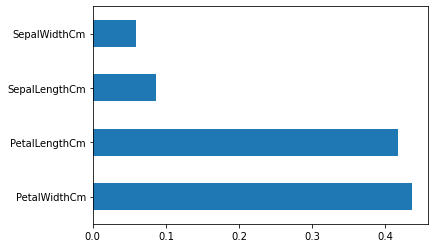

In [245]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns

In [247]:
data = X_test1
x = data.iloc[:,1:6]

In [248]:
x.dtypes

SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [249]:
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

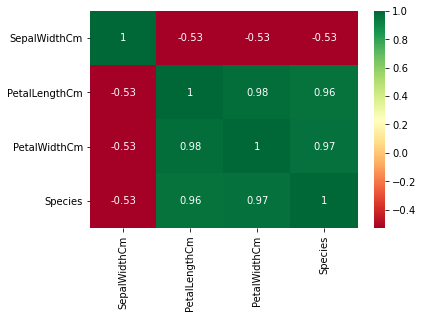

In [250]:
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

## Predictions

In [251]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,26,2)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [252]:
scores

{1: 1.0,
 3: 1.0,
 5: 1.0,
 7: 1.0,
 9: 1.0,
 11: 1.0,
 13: 1.0,
 15: 1.0,
 17: 1.0,
 19: 1.0,
 21: 1.0,
 23: 1.0,
 25: 1.0}

In [253]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,26,2)
scores1 = {}
scores_list1 = []

for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train1,y_train1)
    y_pred1 = knn1.predict(X_test1)
    scores1[k] = metrics.accuracy_score(y_test1, y_pred1)
    scores_list1.append(metrics.accuracy_score(y_test1, y_pred1))

In [254]:
scores1

{1: 1.0,
 3: 1.0,
 5: 1.0,
 7: 1.0,
 9: 1.0,
 11: 1.0,
 13: 1.0,
 15: 1.0,
 17: 1.0,
 19: 1.0,
 21: 1.0,
 23: 1.0,
 25: 1.0}

Text(0, 0.5, 'Testing Accuracy')

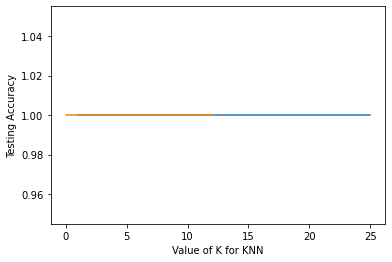

In [255]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, scores_list, scores_list1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Experiment 1


In [256]:
model = KNeighborsClassifier(n_neighbors=13) 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [257]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=13)

In [258]:
predictions = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [259]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions))
print('F1 score  : ', f1_score(y_test, predictions, average="weighted"))
print('Recall    : ', recall_score(y_test, predictions, average="weighted"))
print('Precision : ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8444444444444444
F1 score  :  0.8452674897119342
Recall    :  0.8444444444444444
Precision :  0.8473970473970474
Confusion matrix: 
[[21  0  0]
 [ 0  7  3]
 [ 0  4 10]]


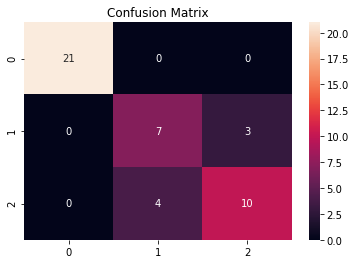

In [260]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()

### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [261]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=13)

In [262]:
predictions = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [263]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions))
print('F1 score  : ', f1_score(y_test, predictions, average="weighted"))
print('Recall    : ', recall_score(y_test, predictions, average="weighted"))
print('Precision : ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9555555555555556
F1 score  :  0.9555555555555556
Recall    :  0.9555555555555556
Precision :  0.9555555555555556
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]


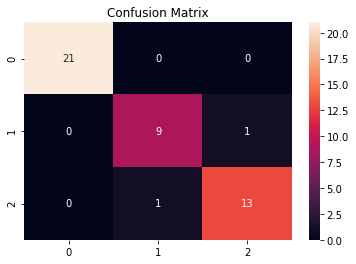

In [264]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [265]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(n_neighbors=13)

In [266]:
predictions = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [267]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions))
print('F1 score  : ', f1_score(y_test, predictions, average="weighted"))
print('Recall    : ', recall_score(y_test, predictions, average="weighted"))
print('Precision : ', precision_score(y_test, predictions, average="weighted"))
confusion = confusion_matrix(y_test, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
F1 score  :  0.9775761242185925
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


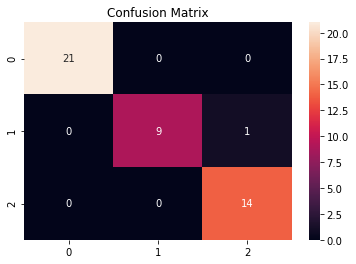

In [268]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()

### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [269]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=13)

In [270]:
predictions = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [271]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions))
print('F1 score  : ', f1_score(y_test1, predictions, average="weighted"))
print('Recall    : ', recall_score(y_test1, predictions, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8333333333333334
F1 score  :  0.8360071301247771
Recall    :  0.8333333333333334
Precision :  0.8416666666666667
Confusion matrix: 
[[16  0  0]
 [ 0  3  2]
 [ 0  3  6]]


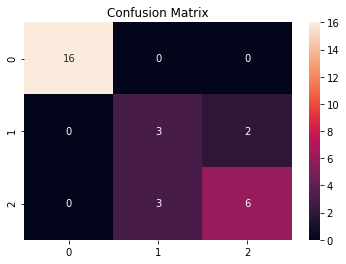

In [272]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [273]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=13)

In [274]:
predictions = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [275]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions))
print('F1 score  : ', f1_score(y_test1, predictions, average="weighted"))
print('Recall    : ', recall_score(y_test1, predictions, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9333333333333333
F1 score  :  0.9333333333333333
Recall    :  0.9333333333333333
Precision :  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [276]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(n_neighbors=13)

In [277]:
predictions = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [278]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions))
print('F1 score  : ', f1_score(y_test1, predictions, average="weighted"))
print('Recall    : ', recall_score(y_test1, predictions, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions, average="weighted"))
confusion = confusion_matrix(y_test1, predictions)
print('Confusion matrix: ')
print(confusion)


Accuracy  :  0.9666666666666667
F1 score  :  0.9656920077972709
Recall    :  0.9666666666666667
Precision :  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


## Feature Scaling

In [279]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_test = sc_X.fit_transform(X_test)
#X_train = sc_X.fit_transform(X_train)
#X_test1 = sc_X.fit_transform(X_test1)
#X_train1 = sc_X.fit_transform(X_train1)

## Experiment 2

In [280]:
import math
math.sqrt(len(X_train))


10.246950765959598

In [281]:
import math
math.sqrt(len(X_train1))


10.954451150103322

In [282]:
model = KNeighborsClassifier(n_neighbors=10, p=2, metric='euclidean') 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [283]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [284]:
predictions1 = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [285]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions1))
print('F1 score  : ', f1_score(y_test, predictions1, average="weighted"))
print('Recall    : ', recall_score(y_test, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8444444444444444
F1 score  :  0.845256038647343
Recall    :  0.8444444444444444
Precision :  0.8579642579642579
Confusion matrix: 
[[21  0  0]
 [ 0  8  2]
 [ 0  5  9]]


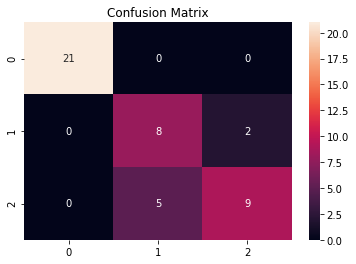

In [286]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()

### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [287]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [288]:
predictions1 = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [289]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions1))
print('F1 score  : ', f1_score(y_test, predictions1, average="weighted"))
print('Recall    : ', recall_score(y_test, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9555555555555556
F1 score  :  0.9555555555555556
Recall    :  0.9555555555555556
Precision :  0.9555555555555556
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]


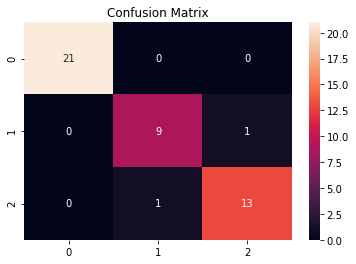

In [290]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [291]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [292]:
predictions1 = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [293]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions1))
print('F1 score  : ', f1_score(y_test, predictions1, average="weighted"))
print('Recall    : ', recall_score(y_test, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test, predictions1, average="weighted"))
confusion = confusion_matrix(y_test, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
F1 score  :  0.9775761242185925
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


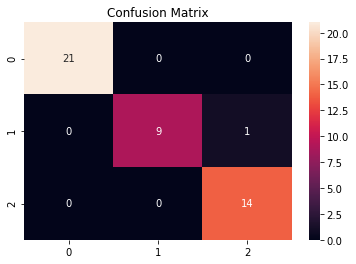

In [294]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()

### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [295]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [296]:
predictions1 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [297]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions1))
print('F1 score  : ', f1_score(y_test1, predictions1, average="weighted"))
print('Recall    : ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8333333333333334
F1 score  :  0.8358974358974359
Recall    :  0.8333333333333334
Precision :  0.8666666666666667
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  4  5]]


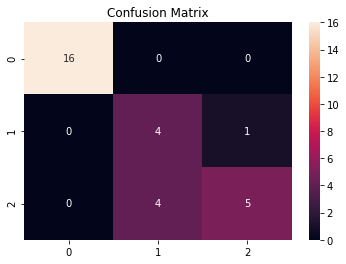

In [298]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()


### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [299]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [300]:
predictions1 = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [301]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions1))
print('F1 score  : ', f1_score(y_test1, predictions1, average="weighted"))
print('Recall    : ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9333333333333333
F1 score  :  0.9333333333333333
Recall    :  0.9333333333333333
Precision :  0.9333333333333333
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


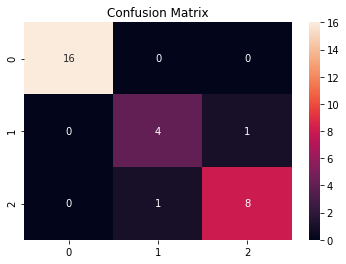

In [302]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()

### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [303]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [304]:
predictions1 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions1

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [305]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions1))
print('F1 score  : ', f1_score(y_test1, predictions1, average="weighted"))
print('Recall    : ', recall_score(y_test1, predictions1, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions1, average="weighted"))
confusion = confusion_matrix(y_test1, predictions1)
print('Confusion matrix: ')
print(confusion)


Accuracy  :  0.9666666666666667
F1 score  :  0.9656920077972709
Recall    :  0.9666666666666667
Precision :  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


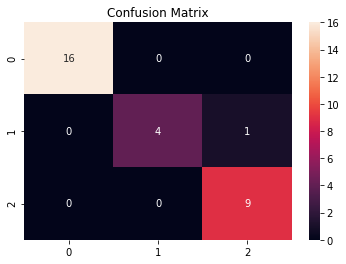

In [306]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()

## Experiment 3
 

In [307]:
import math
math.sqrt(len(y_test))

6.708203932499369

In [308]:
model = KNeighborsClassifier(n_neighbors=6, p=2, metric='euclidean') 

### For 70% train_set and 30% test_set

### Using SepalLengthCm and SepalWidthCm to predict the species of iris

In [309]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [310]:
predictions2 = model.predict(X_test[['SepalLengthCm','SepalWidthCm']])
predictions2

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [311]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions2))
print('F1 score  : ', f1_score(y_test, predictions2, average="weighted"))
print('Recall    : ', recall_score(y_test, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.8222222222222222
F1 score  :  0.8222222222222222
Recall    :  0.8222222222222222
Precision :  0.8425396825396826
Confusion matrix: 
[[21  0  0]
 [ 0  8  2]
 [ 0  6  8]]


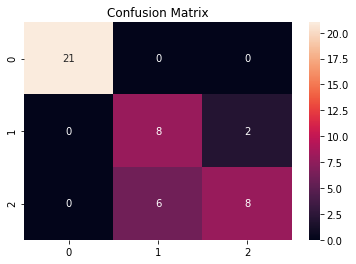

In [312]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()

### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [313]:
model.fit(X_train[['PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [314]:
predictions2 = model.predict(X_test[['PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [315]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions2))
print('F1 score  : ', f1_score(y_test, predictions2, average="weighted"))
print('Recall    : ', recall_score(y_test, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
F1 score  :  0.9778953556731335
Recall    :  0.9777777777777777
Precision :  0.9797979797979799
Confusion matrix: 
[[21  0  0]
 [ 0 10  0]
 [ 0  1 13]]


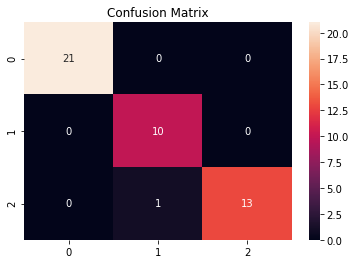

In [316]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()


### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [317]:
model.fit(X_train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [318]:
predictions2 = model.predict(X_test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [319]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test, predictions2))
print('F1 score  : ', f1_score(y_test, predictions2, average="weighted"))
print('Recall    : ', recall_score(y_test, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test, predictions2, average="weighted"))
confusion = confusion_matrix(y_test, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9777777777777777
F1 score  :  0.9775761242185925
Recall    :  0.9777777777777777
Precision :  0.9792592592592592
Confusion matrix: 
[[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


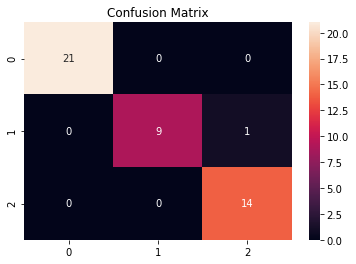

In [320]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()

### For 80% train_set and 20% test_set

### Using SepalLengthCm and SepallWidthCm to predict the species of iris

In [321]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [322]:
predictions2 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [323]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions2))
print('F1 score  : ', f1_score(y_test1, predictions2, average="weighted"))
print('Recall    : ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9
F1 score  :  0.9068341604631928
Recall    :  0.9
Precision :  0.9375
Confusion matrix: 
[[15  1  0]
 [ 0  5  0]
 [ 0  2  7]]



### Using PetalLengthCm and PetalWidthCm to predict the species of iris

In [324]:
model.fit(X_train1[['PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [325]:
predictions2 = model.predict(X_test1[['PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [326]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions2))
print('F1 score  : ', f1_score(y_test1, predictions2, average="weighted"))
print('Recall    : ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9666666666666667
F1 score  :  0.9672014260249554
Recall    :  0.9666666666666667
Precision :  0.9722222222222222
Confusion matrix: 
[[16  0  0]
 [ 0  5  0]
 [ 0  1  8]]



### Using SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm to predict the species of iris

In [327]:
model.fit(X_train1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']], y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [328]:
predictions2 = model.predict(X_test1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
predictions2

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [329]:
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix, classification_report, accuracy_score

print('Accuracy  : ', accuracy_score(y_test1, predictions2))
print('F1 score  : ', f1_score(y_test1, predictions2, average="weighted"))
print('Recall    : ', recall_score(y_test1, predictions2, average="weighted"))
print('Precision : ', precision_score(y_test1, predictions2, average="weighted"))
confusion = confusion_matrix(y_test1, predictions2)
print('Confusion matrix: ')
print(confusion)

Accuracy  :  0.9666666666666667
F1 score  :  0.9656920077972709
Recall    :  0.9666666666666667
Precision :  0.9700000000000001
Confusion matrix: 
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


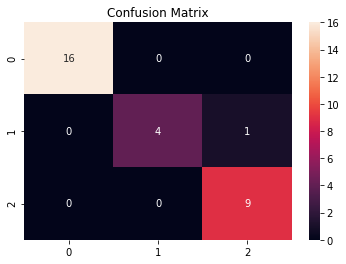

In [330]:
import seaborn as sns
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix')
plt.show()